<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tabulate import tabulate
import seaborn as sns

Problem 1-7

Create a K-means scratch

In [9]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    n_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      Tolerances for the center point and center of gravity on which the iteration ends
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose

        self.best_sse = 10**20
        self.record_myu = None
        self.record_cluster = None




    '''---------------------------------------
    Problem 2: Creating a Function to Find SSE
    ---------------------------------------'''
    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    '''-------------------------------
    Problem 3: Assignment to a cluster
    -------------------------------'''
    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j


    '''-------------------------------
    Problem 4: Moving the center point
    -------------------------------'''
    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)



    '''------------------
    Problem 5: Repetition
    ------------------'''
    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("Initialization: %s Training Count: %s Best SSE: %s"%(i,j,self.best_sse))



    '''------------------
    Problem 7: Estimation
    ------------------'''
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

Problem 8: Implementation of the elbow method

In [11]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
print("X shape: {} and type: {}".format(X.shape, type(X)))


X_train, X_valid = train_test_split(X,train_size=0.8,random_state=None)

clf = ScratchKMeans(n_clusters=4,n_init=5, n_iter=100,verbose=True)
clf.fit(X_train)

pred = clf.predict(X_valid)
print(pred)

X shape: (100, 2) and type: <class 'numpy.ndarray'>
Initialization: 0 Training Count: 0 Best SSE: 715.0848709897855
Initialization: 0 Training Count: 1 Best SSE: 204.57111999893723
Initialization: 0 Training Count: 2 Best SSE: 193.3720977497181
Initialization: 0 Training Count: 3 Best SSE: 172.93559634224303
Initialization: 0 Training Count: 4 Best SSE: 123.10467514160128
Initialization: 0 Training Count: 5 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 6 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 7 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 8 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 9 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 10 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 11 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 12 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 13 Best SSE: 107.86153236121083
Initialization: 0 Training Count: 14

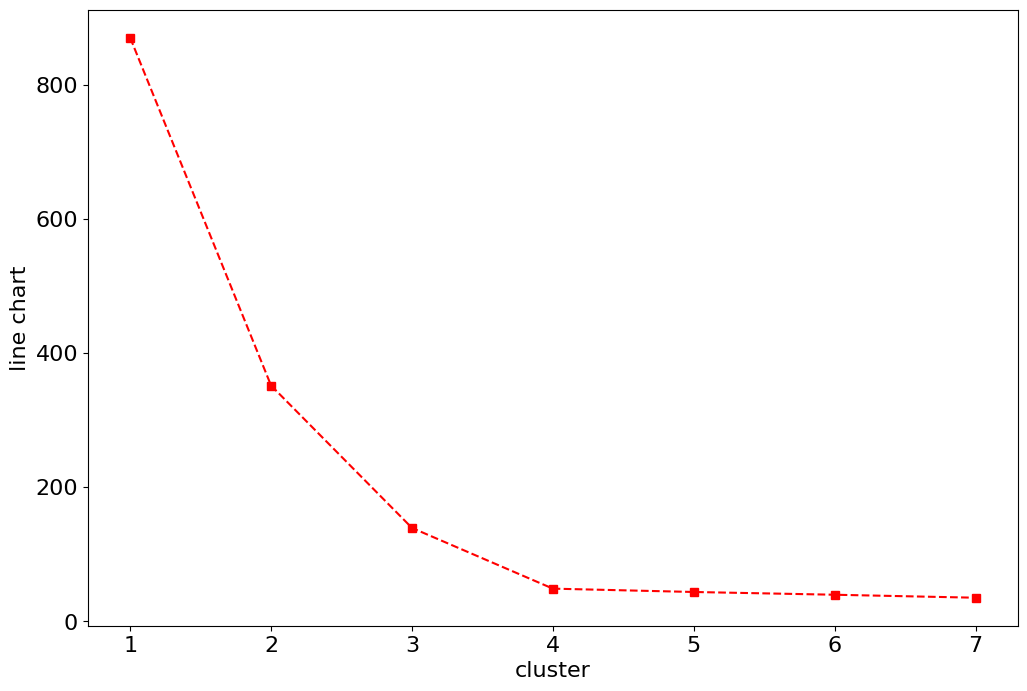

In [12]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.xlabel('cluster')
plt.ylabel('line chart')
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

Problem 10: Select the number of clusters k

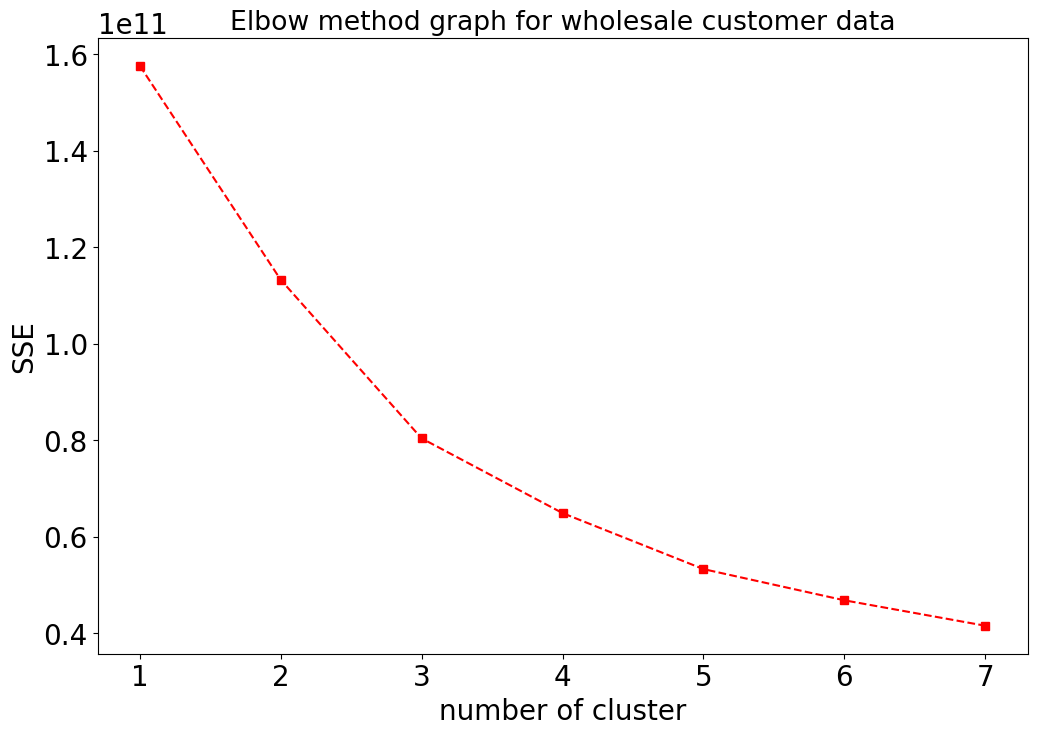

Elbow method graph for wholesale customer data k = 2 is most optimal. Because the bending of graph is occured at k = 2.


In [13]:
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values



elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 16
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--')
plt.title("Elbow method graph for wholesale customer data")
plt.xlabel('number of cluster')
plt.ylabel("SSE")
plt.show()

print("Elbow method graph for wholesale customer data k = 2 is most optimal. Because the bending of graph is occured at k = 2.")


Problem 11: Comparison with known groups

In [14]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame({'pred':pred,'Region':data['Region'],'Channel':data['Channel'],})

In [15]:
print('predicted value / Region')
table1 = pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)
#print(table1)
table1

predicted value / Region


pred,0.0,1.0,2.0,3.0
Region,,,,
1,10,49,16,2
2,4,30,12,1
3,44,197,67,8


In [16]:
print('predicted value / channel')
table2 = pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)
#print(table2)
table2

predicted value / channel


pred,0.0,1.0,2.0,3.0
Channel,,,,
1,50,234,13,1
2,8,42,82,10


Problem 12: Useful information for wholesalers

In [17]:
data['cluster'] = pred

table = data.groupby('cluster').agg(['mean','max','min'])
#print(table)
table

Channel            Region                 Fresh                 \
             mean max min      mean max min          mean     max    min   
cluster                                                                    
0.0      1.137931   2   1  2.586207   3   1  36144.482759  112151  22096   
1.0      1.152174   2   1  2.536232   3   1   9087.463768   23257      3   
2.0      1.863158   2   1  2.536842   3   1   4808.842105   22039     18   
3.0      1.909091   2   1  2.545455   3   1  19888.272727   44466     85   

                 Milk  ... Grocery       Frozen             Detergents_Paper  \
                 mean  ...     min         mean    max  min             mean   
cluster                ...                                                     
0.0       5471.465517  ...     471  6298.655172  60869  127      1064.000000   
1.0       3027.427536  ...       3  2817.985507  35009   47      1003.003623   
2.0      10525.010526  ...    8852  1462.589474  10155   25      7302.400000   
3.0      36142.363636  ...   20170  6328.909091  36534   36     21417.090909   

                      Delicassen              
           max  min         mean    max  min  
cluster                                       
0.0       5058   10  2316.724138  14351    3  
1.0       5316    3  1040.525362   7844    3  
2.0      17740  241  1650.884211  14472    3  
3.0      40827  239  8414.000000  47943  903  

[4 rows x 24 columns]